# Functional Analysis from EBI-MGNify

_Matin Nuhamunada_<sup>1*</sup>, _Ahmad Ardi_<sup>1*</sup>

<sup>1</sup>Department of Tropical Biology, Universitas Gadjah Mada;   
Jl. Teknika Selatan, Sekip Utara, Bulaksumur, Yogyakarta, Indonesia, 55281;   

*Correspondence: [matin_nuhamunada@ugm.ac.id](mailto:matin_nuhamunada@mail.ugm.ac.id)  

## Daftar Isi
1. Deskripsi Data
2. Challenge
3. Load Library
4. Web Scraping & Data Cleaning
5. Exploratory Data Analysis (EDA)
6. Data Mining

## A. Deskripsi Data
Ada tiga file yang dapat diakses dari hasil analisis fungsional EBI-MGnify: (https://emg-docs.readthedocs.io/en/latest/portal.html#description-of-functional-annotation-files-available-to-download)

1. *InterPro matches file*: it is a tab-delimited file containing 15 columns.
2. *Complete GO annotation file*: it is a comma-separated file containing 4 columns. The first column lists the GO terms (labelled GO:XXXXXXX) having been associated with the predicted CDSs. The second gives the GO term description while the third indicates which category the GO term belong to. There is 3 category: ‘biological process’ (higher biological process such as ‘rRNA modification’) , ‘molecular function’ (individual catalytic activity such as ‘mannosyltransferase activity’) and ‘cellular component’ (cellular localisation of the activity such as ‘mitochondrion’). The last column give the number of predicted CDSs having been annotated with the GO terms for the run.
3. *GO slim annotation file*: this file is derived from the ‘Complete GO annotation file’ and has the same format. The GO slim set is a cut-down version of the GO terms containing a subset of the terms in the whole GO. They give a broad overview of the ontology content without the details of the specific fine grained terms. Go slim terms are used for visualisation on the website. To illustrate how the GO slim terms relates to the GO terms, the different metal binding GO terms present in the ‘Complete GO annotation’ file are summarized as one generic metal binding term in the ‘GO slim annotation’ file. The last column give the number of predicted CDSs having been annotated with the GO slim terms for the run.

## B. Challenge
1. Web Scraping menggunakan RESTful API dari EBI MGnify untuk mencari studi dengan kata kunci "human", "skin", dan kategori  sampel "metagenome" (hasil shotgun sequencing)
2. Melakukan (a) filtering studi dan pemilihan sampel untuk studi komparatif, dan (b) mengambil metadata dari sampel terpilih
3. Web Scraping menggunakan RESTful API dari EBI MGnify untuk mengunduh data hasil analisis fungsional (ketiga file di atas)
4. Melakukan data cleaning dan eksplorasi data (visualisasi)
5. Data mining dengan menggunakan analisis statistik: dengan dimensional reduction (PCoA, UMAP, T2SNE), dan teknik multivariat lainnya


## C. Load Library

In [1]:
import os
from pandas import DataFrame
import pandas as pd
import pycurl

from scipy import stats

import matplotlib.pyplot as plt
plt.close('all')

import seaborn as sns
%matplotlib inline

In [2]:
from jsonapi_client import Session, Filter
import html

API_BASE = 'https://www.ebi.ac.uk/metagenomics/api/latest/'

## D. Webscraping & Data Cleaning
Web Scraping menggunakan RESTful API dari EBI MGnify untuk mencari studi dengan kata kunci "human", "skin", dan kategori sampel "metagenome" (hasil shotgun sequencing)

### D.1 Study
Pada part ini kita akan mencoba melihat ada berapa banyak studi terkait dengan Human Skin di EBI MGnify

In [3]:
#obtaining study data - TO DO!
def get_biome(lineage, exp_type):
    API_BASE_BIOME = 'https://www.ebi.ac.uk/metagenomics/api/latest/biomes'
    with Session(API_BASE_BIOM) as s:
        study = s.get(run,'analysis').resource
        for i in study.downloads:
            if extension in i.file_format['name']:
                link = i.url
    return link

In [15]:
API_BASE_BIOME = 'https://www.ebi.ac.uk/metagenomics/api/latest/biomes'
with Session(API_BASE_BIOME) as s:
    biome = s.get('root:Host-associated:Human:Skin').resource

In [21]:
biome.samples_count

4796

In [22]:
biome.studies

[<ResourceObject: studies: MGYS00005109 (2074857065384) (2074857065384)>,
 <ResourceObject: studies: MGYS00005101 (2074860532008) (2074860532008)>,
 <ResourceObject: studies: MGYS00005102 (2074860752792) (2074860752792)>,
 <ResourceObject: studies: MGYS00005098 (2074857652632) (2074857652632)>,
 <ResourceObject: studies: MGYS00005090 (2074860403064) (2074860403064)>,
 <ResourceObject: studies: MGYS00005037 (2074860647144) (2074860647144)>,
 <ResourceObject: studies: MGYS00005034 (2074861245440) (2074861245440)>,
 <ResourceObject: studies: MGYS00003598 (2074861245608) (2074861245608)>,
 <ResourceObject: studies: MGYS00002184 (2074858296768) (2074858296768)>,
 <ResourceObject: studies: MGYS00002072 (2074858562056) (2074858562056)>,
 <ResourceObject: studies: MGYS00002062 (2074857781008) (2074857781008)>,
 <ResourceObject: studies: MGYS00001818 (2074857782856) (2074857782856)>,
 <ResourceObject: studies: MGYS00001295 (2074865529352) (2074865529352)>,
 <ResourceObject: studies: MGYS0000118

In [23]:
biome.samples

[<ResourceObject: samples: ERS2431609 (2074860493232) (2074860493232)>,
 <ResourceObject: samples: ERS2431610 (2074862191840) (2074862191840)>,
 <ResourceObject: samples: ERS2431611 (2074862794344) (2074862794344)>,
 <ResourceObject: samples: ERS2431612 (2074862795352) (2074862795352)>,
 <ResourceObject: samples: ERS2431613 (2074862796360) (2074862796360)>,
 <ResourceObject: samples: ERS2431614 (2074862219896) (2074862219896)>,
 <ResourceObject: samples: ERS2431615 (2074862220904) (2074862220904)>,
 <ResourceObject: samples: ERS2431616 (2074862221912) (2074862221912)>,
 <ResourceObject: samples: ERS2431617 (2074862222920) (2074862222920)>,
 <ResourceObject: samples: ERS2431618 (2074862908024) (2074862908024)>,
 <ResourceObject: samples: ERS2431619 (2074862909032) (2074862909032)>,
 <ResourceObject: samples: ERS2431620 (2074862910040) (2074862910040)>,
 <ResourceObject: samples: ERS2431621 (2074862911048) (2074862911048)>,
 <ResourceObject: samples: ERS2431622 (2074862192064) (207486219

In [4]:
#load study data
study_data = pd.read_csv("data_study.csv")
study_data

,MGnify ID,ENA accession,Biome,Name,Description,Samples,Analyses,Centre name
0,MGYS00005037,PRJNA277905,Skin,Human Skin Microbiome Metagenome,Human Skin Microbiome,106,106,BioProject
1,MGYS00001187,PRJEB14948,Skin,Microbiome samples derived from Buruli ulcer w...,Background: Buruli ulcer (BU) is an infectious...,14,14,Institute of tropical medicine
2,MGYS00000518,PRJEB10133,Skin,These samples are selections from a larger coh...,These samples are selections from a larger coh...,10,10,GSTT BRC Bioinformatics
3,MGYS00005090,PRJEB33173,Naris,EMG produced TPA metagenomics fasta_path of th...,The PRJEB25223 Third Party Annotation (TPA) fa...,120,120,EMG
4,MGYS00000604,PRJNA46333,Skin,Gene-Environment Interactions at the Skin Surface,16S rRNA gene sequences amplified from subject...,2560,4385,NIAMS
5,MGYS00005034,PRJEB29894,Skin,EMG produced TPA metagenomics assembly of the ...,The human skin metagenome Third Party Annotati...,33,33,EMG
6,MGYS00003598,PRJEB25958,Skin,EMG produced TPA metagenomics assembly of the ...,The human skin metagenome Third Party Annotati...,94,94,EMG
7,MGYS00002062,PRJEB22555,Skin,EMG produced TPA metagenomics assembly of the ...,The human wound Third Party Annotation (TPA) a...,13,21,EMG
8,MGYS00005098,PRJNA435265,Skin,Isolation and Identification of the Follicular...,"In this study, we compare the both sequencing ...",101,101,BioProject
9,MGYS00001295,PRJEB16723,Skin,Human skin bacterial and fungal microbiotas an...,Using high-throughput 16S rDNA and ITS1 sequen...,96,96,Universidade Federal do ABC


In [5]:
print(study_data.describe())
print('\n' + 'Total sampel: ' + str(study_data.Samples.sum()) + '\n')
print('Centers : ' + str(len(study_data['Centre name'].unique())))
x = 0
for i in study_data['Centre name'].unique():
    x = x + 1
    print(str(x) + ' ' + i)

           Samples     Analyses
count    16.000000    16.000000
mean    253.312500   367.937500
std     619.913942  1073.931312
min       1.000000     2.000000
25%      28.250000    30.000000
50%      98.500000    98.500000
75%     182.000000   182.000000
max    2560.000000  4385.000000

Total sampel: 4053

Centers : 10
1 BioProject
2 Institute of tropical medicine
3 GSTT BRC Bioinformatics
4 EMG
5 NIAMS
6 Universidade Federal do ABC
7 The ithree institute
8 P&G Singapore Innovation Center
9 LEIDEN UNIVERSITY MEDICAL CENTER
10 LSHTM


### D.2 Kesimpulan Studi
Diperoleh 15 studi di EBI yang dilakukan dari 10 institusi, dengan total sampel terkait human skin microbiome sebanyak 4053

## D.3 Samples
Pada part ini kita akan melihat sampel apa saja yang tersedia untuk human skin metagenome

In [6]:
# Load samples
sample_data = pd.read_csv("data_sample.csv")

In [7]:
# Rapikan label
label = []
for i in sample_data.Description:
    y = " ".join(i.split())
    label.append(y)

In [8]:
# Replace label
for x in range(len(sample_data)):
    sample_data.Description[x] = label[x]
sample_data.head()

,Sample,MGnify ID,Name,Description
0,SRS731606,MGYS00000604,MET0253,Human Skin Metagenome
1,SRS927202,"MGYS00005034,MGYS00005101",SKCT13_b2_58,This sample has been submitted by Centre for I...
2,SRS927151,"MGYS00005034,MGYS00005101",SKCT13_b2_29,This sample has been submitted by Centre for I...
3,SRS732144,MGYS00000604,MET0320,Human Skin Metagenome
4,ERS2431693,MGYS00005102,MBS490,Head_kid_1h


In [9]:
x = 0
for i in sample_data.Description.unique():
    x = x + 1
    print(str(x) + ' ' + i)

1 Human Skin Metagenome
2 This sample has been submitted by Centre for Integrative Biology on 2015-05-02; human skin metagenome
3 Head_kid_1h
4 Underarm_teen_8h
5 Underarm_teen_1h
6 AD upper_back UB LES
7 not applicable
8 Head_teen_8h
9 Head_kid_8h
10 Neck_kid_1h
11 This sample has been submitted by pda|jakehall1 on 2018-08-02; skin metagenome
12 TRL lower_back LB NON_LES
13 Head_teen_1h
14 Neck_kid_8h
15 Neck_teen_8h
16 Underarm_kid_1h
17 Underarm_kid_8h
18 Neck_teen_1h
19 AD posterior_thigh PT NON_LES
20 P1709_1072
21 P752_123
22 CTRL thigh T NON_LES
23 CTRL lower_back LB NON_LES
24 Palm WGS metagenome
25 PSO lower_back LB LES
26 AD posterior_thigh PT LES


In [10]:
sample_data.groupby(['MGnify ID']).describe()

Sample                          Name         \
                           count unique         top freq count unique   
MGnify ID                                                               
MGYS00000518                  10     10   ERS805761    1    10     10   
MGYS00000520                   1      1   ERS809858    1     1      1   
MGYS00000604                 291    291   SRS731968    1   291    291   
MGYS00003598,MGYS00005037     94     94   SRS892021    1    94     94   
MGYS00005034,MGYS00005101     33     33   SRS927206    1    33     33   
MGYS00005098                  44     44  SRS2987429    1    44     44   
MGYS00005101                  40     40   SRS927223    1    40     40   
MGYS00005102                 179    179  ERS2431642    1   179    179   

                                                    Description         \
                                           top freq       count unique   
MGnify ID                                                                
MGYS00000518                        P1896_1043    1          10      9   
MGYS00000520               Palm WGS metagenome    1           1      1   
MGYS00000604                           MET0219    1         291      1   
MGYS00003598,MGYS00005037               WBS015    1          94      1   
MGYS00005034,MGYS00005101         SKCT13_b2_29    1          33      1   
MGYS00005098                      Neg_Pore_WGS    1          44      1   
MGYS00005101                      SKCT13_b2_15    1          40      1   
MGYS00005102                            MBS406    1         179     12   

                                                                              \
                                                                         top   
MGnify ID                                                                      
MGYS00000518                                            AD upper_back UB LES   
MGYS00000520                                             Palm WGS metagenome   
MGYS00000604                                           Human Skin Metagenome   
MGYS00003598,MGYS00005037                                     not applicable   
MGYS00005034,MGYS00005101  This sample has been submitted by Centre for I...   
MGYS00005098               This sample has been submitted by pda|jakehall...   
MGYS00005101               This sample has been submitted by Centre for I...   
MGYS00005102                                                 Underarm_kid_8h   

                                
                          freq  
MGnify ID                       
MGYS00000518                 2  
MGYS00000520                 1  
MGYS00000604               291  
MGYS00003598,MGYS00005037   94  
MGYS00005034,MGYS00005101   33  
MGYS00005098                44  
MGYS00005101                40  
MGYS00005102                15

In [11]:
sample_data['MGnify ID'].count()

692

In [12]:
study_id = sample_data['MGnify ID'].unique()
study_id_clean = []
for x in study_id:
    y = x.split(',')
    for z in y:
        study_id_clean.append(z)
study_id_clean = list(dict.fromkeys(study_id_clean))

In [13]:
x = 0
for i in study_id_clean:
    x = x + 1
    print(str(x) + ' ' + i)

1 MGYS00000604
2 MGYS00005034
3 MGYS00005101
4 MGYS00005102
5 MGYS00000518
6 MGYS00003598
7 MGYS00005037
8 MGYS00005098
9 MGYS00000520


In [14]:
df = study_data.loc[study_data['MGnify ID'].isin(study_id_clean)]
df.reset_index(drop=True)

,MGnify ID,ENA accession,Biome,Name,Description,Samples,Analyses,Centre name
0,MGYS00005037,PRJNA277905,Skin,Human Skin Microbiome Metagenome,Human Skin Microbiome,106,106,BioProject
1,MGYS00000518,PRJEB10133,Skin,These samples are selections from a larger coh...,These samples are selections from a larger coh...,10,10,GSTT BRC Bioinformatics
2,MGYS00000604,PRJNA46333,Skin,Gene-Environment Interactions at the Skin Surface,16S rRNA gene sequences amplified from subject...,2560,4385,NIAMS
3,MGYS00005034,PRJEB29894,Skin,EMG produced TPA metagenomics assembly of the ...,The human skin metagenome Third Party Annotati...,33,33,EMG
4,MGYS00003598,PRJEB25958,Skin,EMG produced TPA metagenomics assembly of the ...,The human skin metagenome Third Party Annotati...,94,94,EMG
5,MGYS00005098,PRJNA435265,Skin,Isolation and Identification of the Follicular...,"In this study, we compare the both sequencing ...",101,101,BioProject
6,MGYS00005102,PRJEB26427,Skin,Understanding the microbial basis of body odor...,Metagenomics samples of multiple skin sites (u...,179,179,P&G Singapore Innovation Center
7,MGYS00005101,PRJNA281366,Skin,Skin metagenomes,Skin shotgun metagenomes from psoriasis patients,73,73,BioProject
8,MGYS00000520,PRJEB10295,Skin,Whole genome sequencing of metagenomes extract...,Whole genome sequencing of metagenomes extract...,1,2,LEIDEN UNIVERSITY MEDICAL CENTER


### Kesimpulan
Hanya ada 9 Studi terkait data metagenome

### Ambil Metadata

In [15]:
study_id

array(['MGYS00000604', 'MGYS00005034,MGYS00005101', 'MGYS00005102',
       'MGYS00005101', 'MGYS00000518', 'MGYS00003598,MGYS00005037',
       'MGYS00005098', 'MGYS00000520'], dtype=object)

In [16]:
filtered_data = sample_data.loc[sample_data['MGnify ID'] == study_id[0]] #ganti nomor ini dari study id
filtered_data = filtered_data.reset_index(drop=True)
filtered_data

,Sample,MGnify ID,Name,Description
0,SRS731606,MGYS00000604,MET0253,Human Skin Metagenome
1,SRS732144,MGYS00000604,MET0320,Human Skin Metagenome
2,SRS731939,MGYS00000604,MET0273,Human Skin Metagenome
3,SRS728263,MGYS00000604,MET0040,Human Skin Metagenome
4,SRS727161,MGYS00000604,MET0007,Human Skin Metagenome
...,...,...,...,...
286,SRS731560,MGYS00000604,MET0232,Human Skin Metagenome
287,SRS728336,MGYS00000604,MET0118,Human Skin Metagenome
288,SRS731552,MGYS00000604,MET0224,Human Skin Metagenome
289,SRS731932,MGYS00000604,MET0265,Human Skin Metagenome


### Getting Sample Metadata

In [17]:
def ebi_sample(sample):
    API_BASE = 'https://www.ebi.ac.uk/metagenomics/api/latest/samples'
    with Session(API_BASE) as s:
        sample = s.get(sample).resource
    return sample

In [18]:
sampled = ebi_sample('SRS731606')

In [19]:
print(sampled.accession)
print(sampled.analysis_completed)
#print(sampled.biome)
print(sampled.biosample)
print(sampled.collection_date)
print(sampled.environment_biome)
print(sampled.environment_feature)
print(sampled.environment_material)
print(sampled.geo_loc_name)
print(sampled.host_tax_id)
print(sampled.last_update)
print(sampled.latitude)
print(sampled.longitude)
print(sampled.runs)
print(sampled.sample_alias)
print(sampled.sample_desc)
print(sampled.sample_metadata)
print(sampled.species)
#print(sampled.studies)

SRS731606
2016-02-03
SAMN03025616
None
None
None
None
None
9606
2016-02-03T11:29:20
None
None
[<ResourceObject: runs: SRR1631560 (2060095535928) (2060095535928)>, <ResourceObject: runs: SRR1631559 (2060095541992) (2060095541992)>, <ResourceObject: runs: SRR1631558 (2060095544680) (2060095544680)>, <ResourceObject: runs: SRR1631557 (2060095582896) (2060095582896)>]
MET0253
Human Skin Metagenome
[{'unit': None, 'key': 'geographic location (longitude)', 'value': '38.984652 N 77.094709 W'}, {'unit': None, 'key': 'geographic location (country and/or sea,region)', 'value': 'USA'}, {'unit': None, 'key': 'collection date', 'value': '2013-04-05'}, {'unit': None, 'key': 'environment (biome)', 'value': 'human skin'}, {'unit': None, 'key': 'environment (feature)', 'value': 'Ac-R'}, {'unit': None, 'key': 'NCBI sample classification', 'value': '539655'}, {'unit': None, 'key': 'instrument model', 'value': 'Illumina HiSeq 2000'}, {'unit': None, 'key': 'host', 'value': 'human'}]
Homo sapiens


In [20]:
sampled = ebi_sample('SRS731606')
for x in sampled.runs:
    print(x.id)
    for y in x.analyses:
        print(y.id)
        for z in y.downloads:
            if 'FASTQ_GO_slim.csv' in z.url:
                print(z.url)

SRR1631560
MGYA00027201
https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00027201/file/SRR1631560_MERGED_FASTQ_GO_slim.csv
SRR1631559
MGYA00025841
https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00025841/file/SRR1631559_MERGED_FASTQ_GO_slim.csv
SRR1631558
MGYA00023807
https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00023807/file/SRR1631558_MERGED_FASTQ_GO_slim.csv
SRR1631557
MGYA00023798
https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00023798/file/SRR1631557_MERGED_FASTQ_GO_slim.csv


In [21]:
filename = y.id + '_FASTQ_GO_slim.csv'
link = z.url

if not os.path.isfile(filename):
    with open(filename, 'wb') as f:
        c = pycurl.Curl()
        c.setopt(c.URL, link)
        c.setopt(c.WRITEDATA, f)
        c.perform()
        c.close()

In [21]:
with open('SRR1631558_MERGED_FASTQ_GO_slim.csv', 'wb') as f:
    c = pycurl.Curl()
    c.setopt(c.URL, 'https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00023807/file/SRR1631558_MERGED_FASTQ_GO_slim.csv')
    c.setopt(c.WRITEDATA, f)
    c.perform()
    c.close()

In [23]:
t = y.downloads[7]
t.url

'https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00023798/file/SRR1631557_MERGED_FASTQ_GO.csv'

## Challenge 2

In [24]:
def get_analysis_result(run, extension):
    API_BASE_RUN = 'https://www.ebi.ac.uk/metagenomics/api/latest/runs'
    with Session(API_BASE_RUN) as s:
        study = s.get(run,'analysis').resource
        for i in study.downloads:
            if extension in i.file_format['name']:
                link = i.url
    return link

In [ ]:
# Updated
def get_study(search, filename):
    if not os.path.isfile(filename):
        with open(filename, 'wb') as f:
            c = pycurl.Curl()
            c.setopt(c.URL, 'https://www.ebi.ac.uk/metagenomics/api/v1/studies?lineage=root&ordering=-last_update&search='+search+'&format=csv')
            c.setopt(c.WRITEDATA, f)
            c.perform()
            c.close()
    return filename

def get_metadata(metadata, key):
    for m in metadata:
        if m['key'].lower() == key.lower():
            value = m['value']
            unit = html.unescape(m['unit']) if m['unit'] else ""
            return "{value} {unit}".format(value=value, unit=unit)
    return None

def get_analysis_result(run, extension):
    API_BASE_RUN = 'https://www.ebi.ac.uk/metagenomics/api/latest/runs'
    with Session(API_BASE_RUN) as s:
        study = s.get(run,'analysis').resource
        for i in study.downloads:
            if extension in i.file_format['name']:
                link = i.url
    return link

#perlu diupdate utk rhizosfer
def random_sampling(dataframe, amount):
    df_random = DataFrame(columns=('Sample_ID','Run_ID','Release_version','Sex','Body_site', 'Description'))
    df_random.index.name = 'No'
    a = 0
    while a < amount:
        i = np.random.choice(dataframe.index.values, 1)
        container = df_random.loc[:, 'Sample_ID']
        if not container.isin([dataframe.loc[i[0], 'Sample_ID']]).any():
            df_random.loc[i[0]] = [dataframe.loc[i[0], 'Sample_ID'], \
                                   dataframe.loc[i[0], 'Run_ID'], \
                                   dataframe.loc[i[0], 'Release_version'], \
                                   dataframe.loc[i[0], 'Sex'], \
                                   dataframe.loc[i[0], 'Body_site'], \
                                   dataframe.loc[i[0], 'Description']\
                                  ]
            a = a + 1
    return df_random

In [ ]:
API_BASE_SAMPLE = 'https://www.ebi.ac.uk/metagenomics/api/v1/samples'
API_BASE_RUNS = 'https://www.ebi.ac.uk/metagenomics/api/v1/runs'
with Session(API_BASE_SAMPLE) as s:
    sample = s.get('SRS731606','runs').resources
    for a in sample:
        print(a)

In [ ]:
a.accession

In [ ]:
API_BASE_RUNS = 'https://www.ebi.ac.uk/metagenomics/api/v1/runs'
with Session(API_BASE_RUNS) as r:
    runs = r.get('SRR1631560','analyses').resources
    for x in runs:
        print(x)

In [ ]:
y = x.downloads
z = x.go_slim

## Challenge 4-5 
### 5.1 Visualize Functional Analysis - Summary

In [22]:
df_slim = pd.DataFrame(columns=['GO_ID', 'Category', 'Pathway'])
file = os.listdir()

for a in range(len(file)):
    if 'slim.csv' in file[a]:
        sample_ID = file[a].replace('_FASTQ_GO_slim.csv', '')
        x = pd.read_csv(file[a], header=None)
        x.columns = ['GO_ID', 'Category', 'Pathway', sample_ID]
        x[sample_ID] = (x[sample_ID] / x[sample_ID].sum()) * 100
        #print(x.head())
        df_slim = pd.merge(x, df_slim, on=['GO_ID','Category','Pathway'], how='left')

df_slim.head()

,GO_ID,Category,Pathway,SRR1631558_MERGED,MGYA00023798,ERR833442,ERR476421
0,GO:0030031,cell projection assembly,biological_process,0.000000,0.000000,0.003444,0.004813
1,GO:0071554,cell wall organization or biogenesis,biological_process,0.060651,0.059846,0.016357,0.192502
2,GO:0016043,cellular component organization,biological_process,0.205839,0.202795,0.238474,0.255065
3,GO:0051301,cell division,biological_process,0.101406,0.103491,0.052516,0.014438
4,GO:0016049,cell growth,biological_process,0.000000,0.000000,0.000000,0.000000


In [25]:
df_slim.to_csv('df_slim.csv')

In [23]:
df_slim_sum = df_slim.drop(columns=['GO_ID','Pathway'])
df_slim_sum = df_slim_sum.set_index('Category')
df_slim_sum.head()

,SRR1631558_MERGED,MGYA00023798,ERR833442,ERR476421
Category,,,,
cell projection assembly,0.000000,0.000000,0.003444,0.004813
cell wall organization or biogenesis,0.060651,0.059846,0.016357,0.192502
cellular component organization,0.205839,0.202795,0.238474,0.255065
cell division,0.101406,0.103491,0.052516,0.014438
cell growth,0.000000,0.000000,0.000000,0.000000


<Figure size 432x288 with 0 Axes>

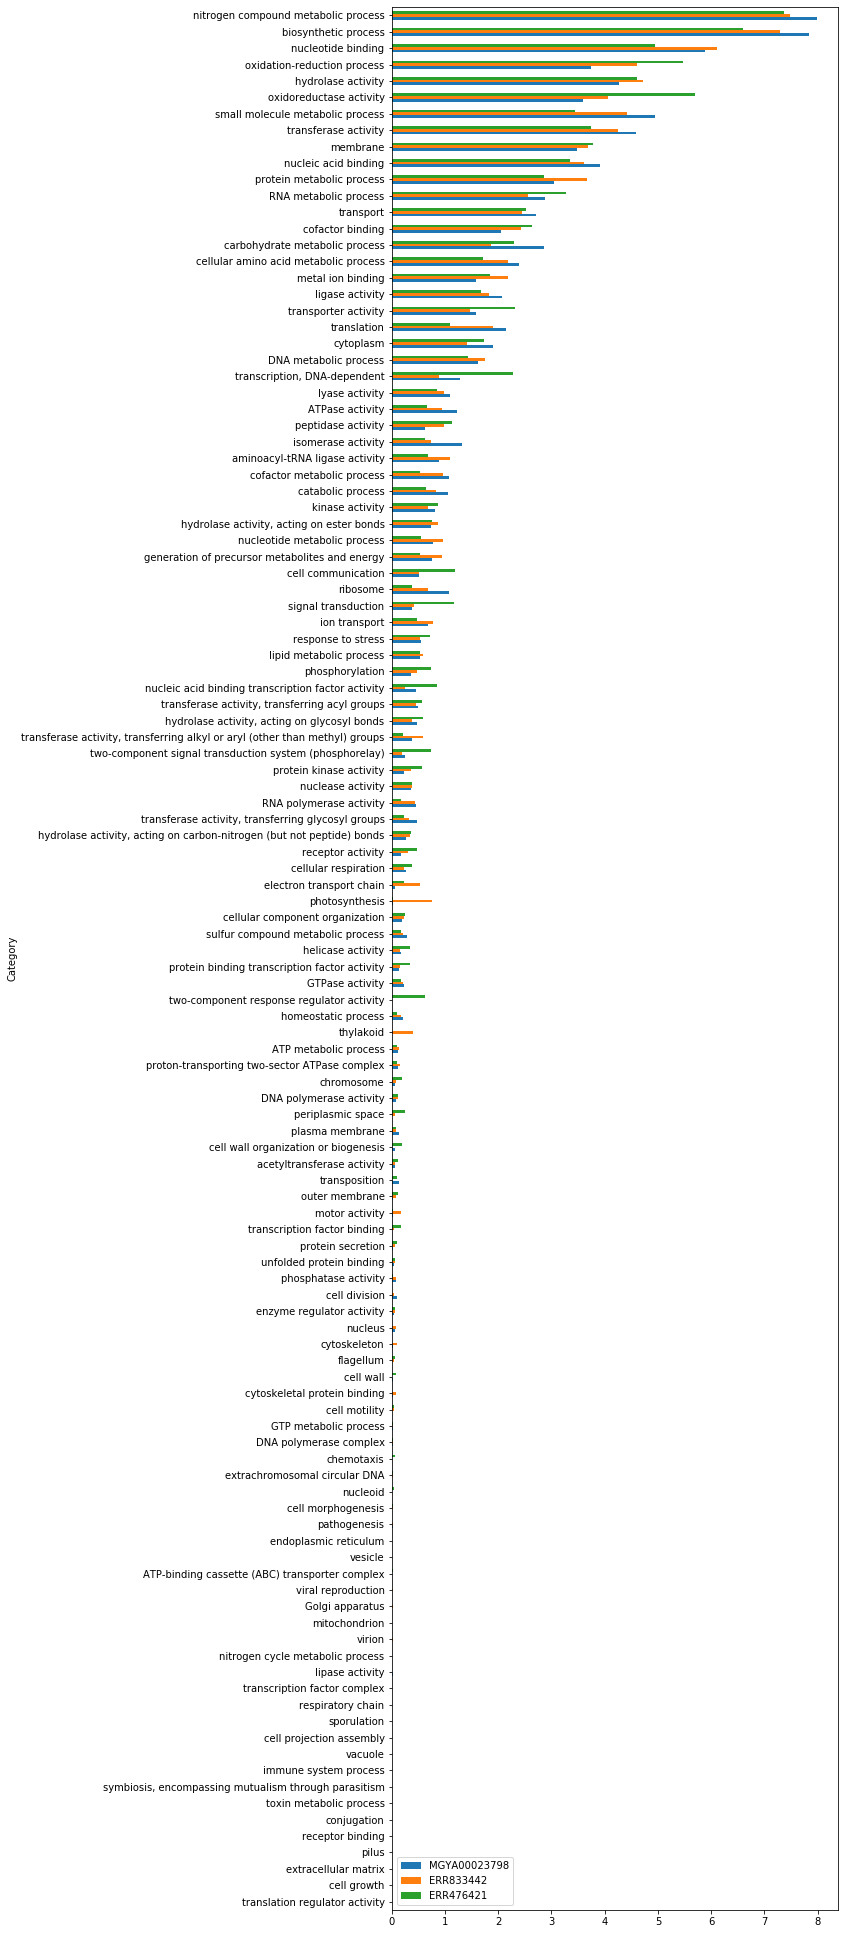

In [27]:
df_slim_sum['total'] = df_slim_sum.sum(axis=1)
df_slim_sum['total'] = df_slim_sum['total']/3
df_slim_sum = df_slim_sum.sort_values('total', ascending=True)
df_plot = df_slim_sum.drop(columns=['total'])
plt.figure()
df_plot.plot.barh(figsize=(8, 35))

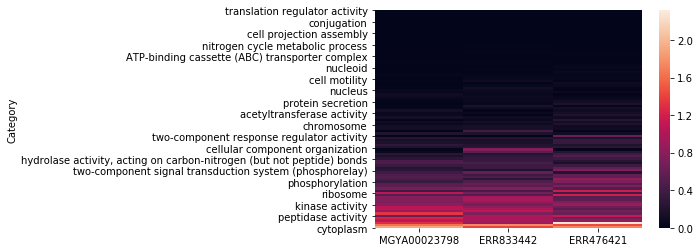

In [28]:
sns.heatmap(df_plot[:100])

<Figure size 432x288 with 0 Axes>

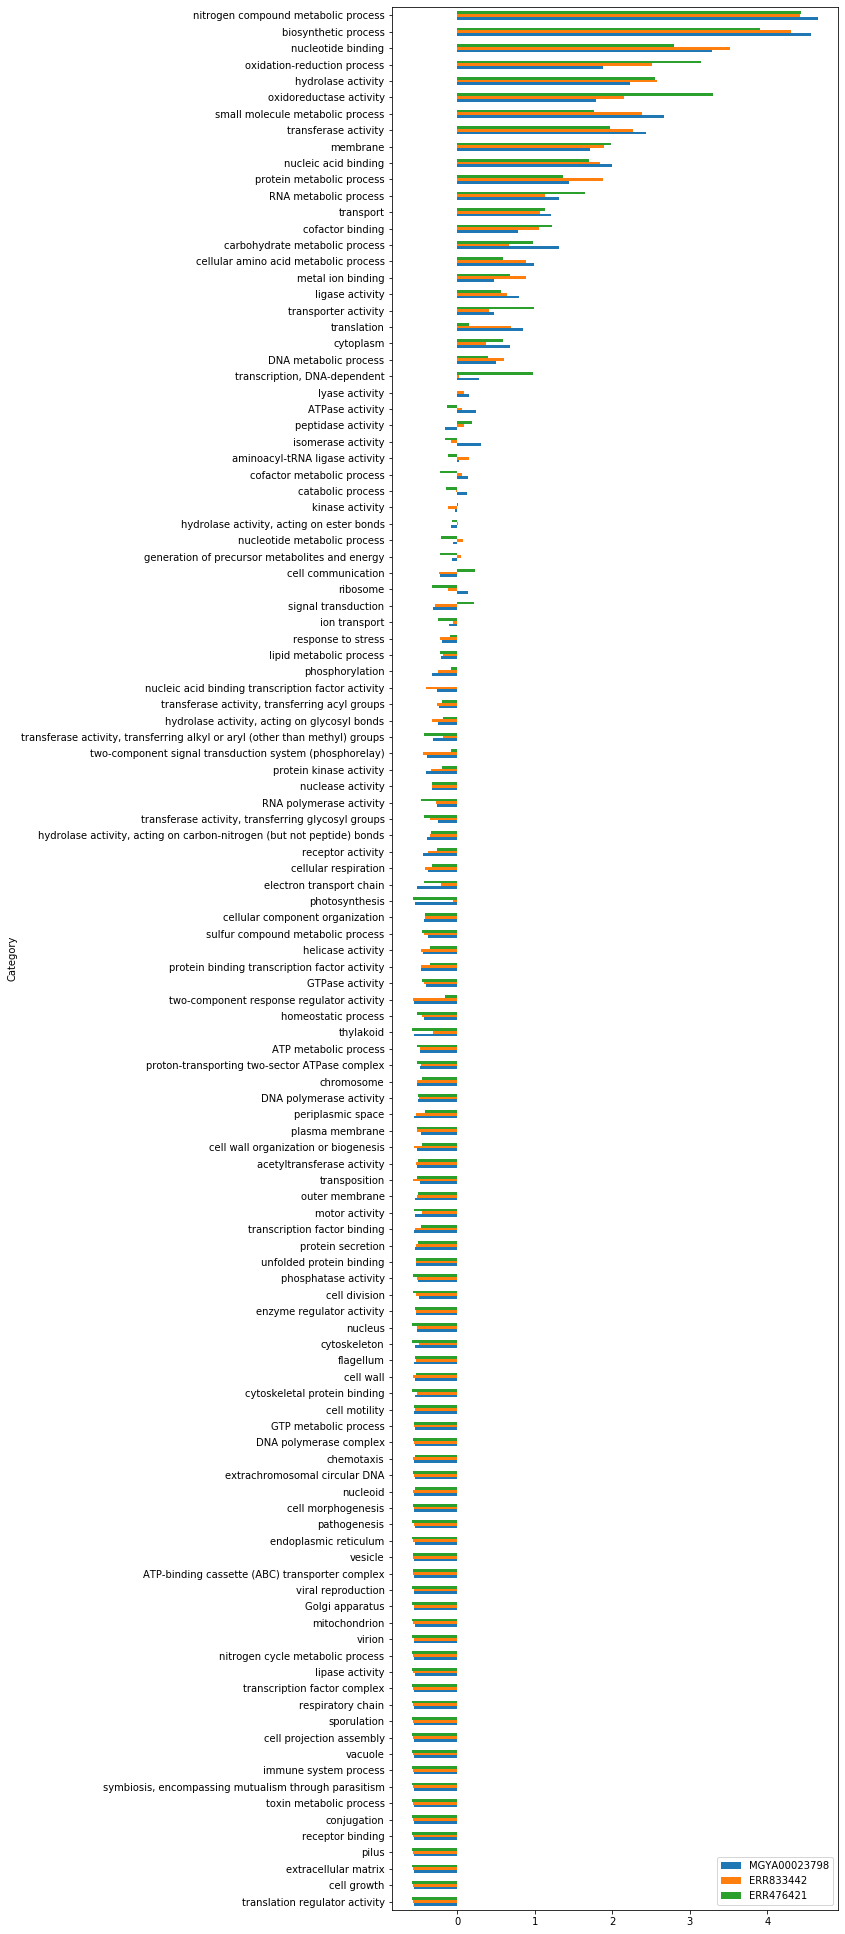

In [29]:
df_plot_z = df_plot.apply(stats.zscore)
plt.figure()
df_plot_z.plot.barh(figsize=(8, 35))

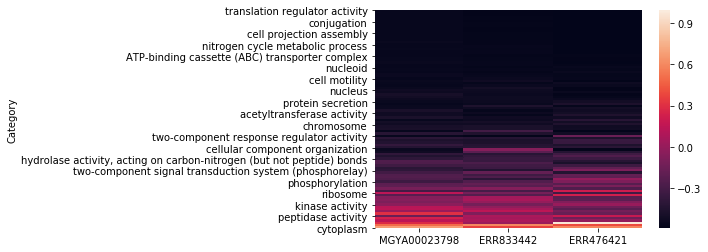

In [30]:
sns.heatmap(df_plot_z[:100])

### 5.2 Detailed GO

In [80]:
df_GO = pd.DataFrame(columns=['GO_ID', 'Category', 'Pathway'])
file = os.listdir()

for a in range(len(file)):
    if 'FASTQ_GO.csv' in file[a]:
        sample_ID = file[a].replace('_FASTQ_GO.csv', '')
        x = pd.read_csv(file[a], header=None)
        x.columns = ['GO_ID', 'Category', 'Pathway', sample_ID]
        x[sample_ID] = (x[sample_ID] / x[sample_ID].sum()) * 100
        #print(x.head())
        df_GO = pd.merge(x, df_GO, on=['GO_ID','Category','Pathway'], how='left')

df_GO.head()

,GO_ID,Category,Pathway,ERR833442,ERR476421
0,GO:0055114,oxidation-reduction process,biological_process,5.135852,6.113513
1,GO:0008152,metabolic process,biological_process,3.422434,4.955105
2,GO:0006810,transport,biological_process,1.352467,1.596275
3,GO:0009058,biosynthetic process,biological_process,1.318352,0.698370
4,GO:0006418,tRNA aminoacylation for protein translation,biological_process,1.171991,0.460038


In [81]:
df_GO_sum = df_GO.drop(columns=['GO_ID','Pathway'])
df_GO_sum = df_GO_sum.set_index('Category')
df_GO_sum.describe()

,ERR833442,ERR476421
count,1459.000000,810.000000
mean,0.068540,0.119673
std,0.329020,0.480137
min,0.001100,0.005543
25%,0.002201,0.011085
50%,0.009904,0.022170
75%,0.035215,0.060969
max,6.119664,6.723201


In [82]:
df_GO_sum['total'] = df_GO_sum.sum(axis=1)
df_GO_sum['total'] = df_GO_sum['total']/2
df_GO_sum = df_GO_sum.sort_values('total', ascending=False)
df_GO_sum.head()

,ERR833442,ERR476421,total
Category,,,
catalytic activity,6.119664,6.723201,6.421433
oxidation-reduction process,5.135852,6.113513,5.624682
ATP binding,6.012919,4.495067,5.253993
metabolic process,3.422434,4.955105,4.188769
oxidoreductase activity,2.432019,3.342202,2.887110


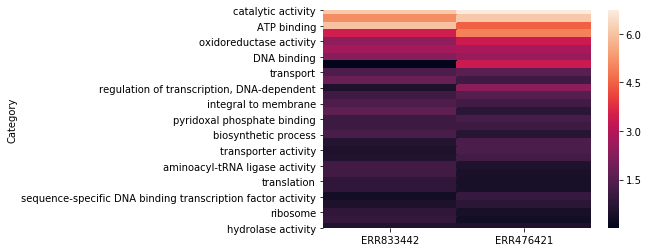

In [83]:
df_heatmap = df_GO_sum.drop(columns=['total'])
sns.heatmap(df_heatmap[:30])#, annot=True, linewidths=.25)

### 5.3 Interpro

In [ ]:
df = pd.read_csv('ERR476421_FASTQ_I5.tsv', header=None, sep='\n')
df = df[0].str.split('\t', expand=True)
df.columns = ['Protein_accession',
              'Sequence_MD5_digest',
              'Sequence_length',
              'Analysis',
              'Signature_accession',
              'Signature_description',
              'Start_location',
              'Stop_location',
              'Score',
              'Status',
              'Date',
              'Interpro_accession',
              'Interpro_description',
              'GO_annotations']
df.head()

In [ ]:
df.Sequence_length.describe()

In [ ]:
df.Sequence_length.unique()

In [ ]:
x = df.Interpro_accession.unique()
x

In [ ]:
df.Interpro_accession.describe()

In [ ]:
df.Interpro_accession